In [1]:
from google.colab import drive

drive.mount('/content/mydrive/')

Mounted at /content/mydrive/


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

2.8.0


In [3]:
df_train = pd.read_csv('/content/mydrive/MyDrive/Colab Notebooks/Deep Learning/Homework_05/Code/Dataset/train.csv', header=None)
df_test = pd.read_csv('/content/mydrive/MyDrive/Colab Notebooks/Deep Learning/Homework_05/Code/Dataset/test.csv', header=None)

In [4]:
df_train_x = df_train.drop([500], axis=1)
df_train_y = df_train[500]
df_test_x = df_test.drop([500], axis=1)
df_test_y = df_test[500]

In [5]:
train_x = df_train_x.to_numpy()
train_y = df_train_y.to_numpy()

test_x = df_test_x.to_numpy()
test_y = df_test_y.to_numpy()

In [6]:
scaler = StandardScaler().fit(train_x)
train_x = scaler.transform(train_x)

In [7]:
scaler = StandardScaler().fit(test_x)
test_x = scaler.transform(test_x)

In [8]:
length = 500

my_rnn = tf.keras.models.Sequential()

my_rnn.add(tf.keras.layers.SimpleRNN(units = length, input_shape = (length,1)))
my_rnn.add(tf.keras.layers.Dense(256))
#my_rnn.add(tf.keras.layers.Dense(100))

my_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 500)               251000    
                                                                 
 dense (Dense)               (None, 256)               128256    
                                                                 
Total params: 379,256
Trainable params: 379,256
Non-trainable params: 0
_________________________________________________________________


In [9]:
x = my_rnn.output
x = tf.keras.layers.Dense(128, activation = 'relu')(x)
x = tf.keras.layers.Dense(128, activation = 'relu')(x)
x = tf.keras.layers.Dense(128, activation = 'relu')(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
new_outputs = tf.keras.layers.Dense(12)(x)
new_outputs = tf.keras.activations.softmax(new_outputs)

In [10]:
#Constrauct the main model
model = tf.keras.models.Model(inputs = my_rnn.inputs, outputs = new_outputs)
model.compile(loss = "sparse_categorical_crossentropy", optimizer ="adam", metrics = ["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_input (InputLaye  [(None, 500, 1)]         0         
 r)                                                              
                                                                 
 simple_rnn (SimpleRNN)      (None, 500)               251000    
                                                                 
 dense (Dense)               (None, 256)               128256    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                             

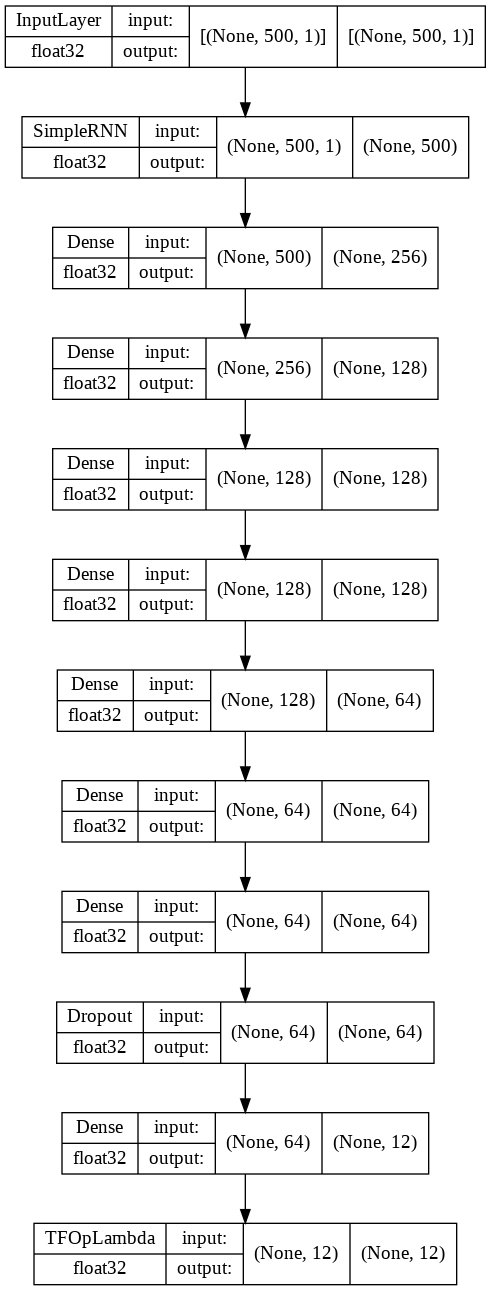

In [11]:
tf.keras.utils.plot_model(model, to_file = "cnn_functional.png", show_shapes = True, show_dtype = True, show_layer_names = False, dpi = 96)

In [14]:
#adam = tf.keras.optimizers.Adam(learning_rate = 0.001)

#my_rnn.compile(loss = "sparse_categorical_crossentropy", optimizer = adam, metrics = ["accuracy"])

checkpoint_filepath = "bestmodel.hdf5"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath, save_weight_only = False, monitor = "accuracy", mode="max", save_best_only = True, verbose=2)

In [16]:
hist = model.fit(train_x, train_y, batch_size = 100, epochs = 100, callbacks = [model_checkpoint_callback],validation_split = 0.2, verbose=1)

Epoch 1/100
51/51 [==============================] - ETA: 0s - loss: 2.1525 - accuracy: 0.1607
Epoch 1: accuracy improved from -inf to 0.16074, saving model to bestmodel.hdf5
51/51 [==============================] - 17s 322ms/step - loss: 2.1525 - accuracy: 0.1607 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/100
51/51 [==============================] - ETA: 0s - loss: 2.1540 - accuracy: 0.1649
Epoch 2: accuracy improved from 0.16074 to 0.16487, saving model to bestmodel.hdf5
51/51 [==============================] - 15s 303ms/step - loss: 2.1540 - accuracy: 0.1649 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/100
51/51 [==============================] - ETA: 0s - loss: 2.1514 - accuracy: 0.1649
Epoch 3: accuracy did not improve from 0.16487
51/51 [==============================] - 15s 303ms/step - loss: 2.1514 - accuracy: 0.1649 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/100
51/51 [==============================] - ETA: 0s - loss: 2.1523 - accuracy: 0.1641
Epoch 4: ac

In [17]:
model.load_weights('bestmodel.hdf5')

In [18]:
#Evaluation

results = model.evaluate(test_x, test_y, batch_size = 100)
print(f"{model.metrics_names}: {results}")

29/29 [==============================] - 1s 33ms/step - loss: nan - accuracy: 0.1113
['loss', 'accuracy']: [nan, 0.11130374670028687]
